In [116]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [117]:
PL = 1
A1 = 2 * (np.mod(PL, 2) + 1)
A2 = 6 * (np.mod(PL, 2) + 1)
Wa = np.mod(PL, 5) + 2
Wb = np.mod(PL, 7) + 7
Wc = np.mod(PL, 9) + 1
print(A1)
print(A2)
print(Wa)
print(Wb)
print(Wc)

4
12
3
8
2


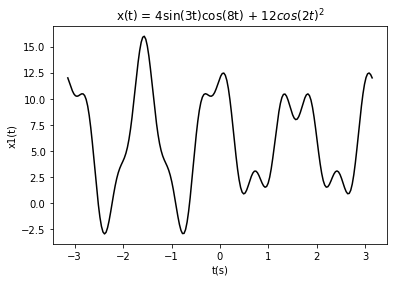

In [118]:
t = np.linspace(-np.pi, np.pi, 200)
x1 = A1 * np.sin(Wa * t) * np.cos(Wb  * t) + 12 * np.cos(Wc * t)**2
plt.plot(t, x1, '-k')
plt.xlabel("t(s)")
plt.ylabel("x1(t)")
plt.title(f"x(t) = {A1}sin({Wa}t)cos({Wb}t) + ${A2}cos({Wc}t)^{2}$")
plt.show()

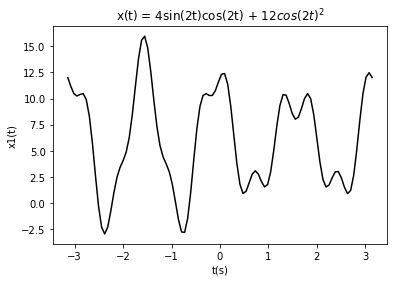

In [119]:
t = sp.symbols('t')
x1t = 4 * sp.sin(Wa * t) * sp.cos(Wb  * t) + 12 * sp.cos(Wc * t)**2
x1tt = sp.lambdify(t, x1t, "numpy")
tt = np.linspace(-np.pi, np.pi, 100)
x1 = x1tt(tt)

plt.plot(tt, x1, '-k')
plt.xlabel("t(s)")
plt.ylabel("x1(t)")
plt.title("x(t) = 4sin(2t)cos(2t) + $12cos(2t)^{2}$")
plt.show()

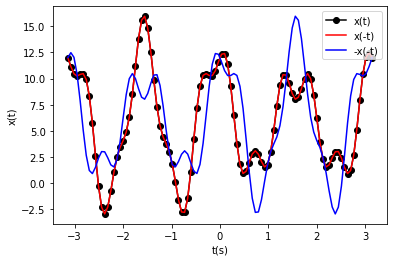

In [120]:
x2t = A1 * sp.sin(Wa * -t) * sp.cos(Wb  * -t) + A2 * sp.cos(Wc * -t)**2
x2tt = sp.lambdify(t, x1t, "numpy")
x2 = x2tt(tt)

plt.plot(tt, x1, '-ok', label = 'x(t)')
plt.plot(tt, x2, '-r', label = 'x(-t)')
plt.plot(-tt, x2, '-b', label = '-x(-t)')
plt.legend(loc = 'upper right') # loc = location
plt.xlabel("t(s)")
plt.ylabel("x(t)")
plt.show()

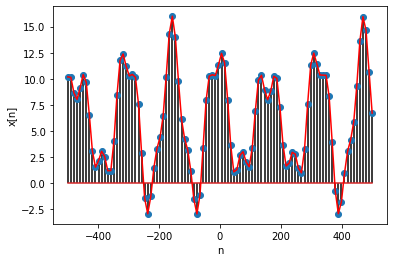

In [121]:
F = 100
T = 1/F
n = np.linspace(-500, 500, 100)
x1 = A1 * np.sin(Wa * n*T) * np.cos(Wb  * n*T) + A2 * np.cos(Wc * n*T)**2
plt.stem(n, x1, 'k', label = 'x(t)')
plt.plot(n, x1, 'r')
plt.xlabel("n")
plt.ylabel("x[n]")
plt.show()

In [122]:
def trapezioVsymnnp(fun, t1, tn, nump):
    h = (tn - t1) / nump
    tv = np.arange(t1 + h, tn - h + h, h)
    ft1 = fun.subs(t, t1)
    ftn = fun.subs(t, tn)
    f = sp.lambdify(t, fun, "numpy")
    return h * ((ft1+ftn)/2 + sum(f(tv)))

def SimpsonRule(fun, t1, tn, nump):
    h = (tn - t1) / (nump - 1)
    ft1 = fun.subs(t, t1)
    ftn = fun.subs(t, tn)
    f = sp.lambdify(t, fun, "numpy")
    # i par
    tvp = np.arange(t1 + 2*h, tn - h + h, 2*h) 
    sfp = sum(sum(f(tvp)))
    # i impar
    tvi = np.arange(t1 + h, tn-h+h, 2*h)
    sfi = sum(f(tvi))
    return (h/3) * (ft1 + ftn + 4 * sfi + 2 * sfp)

In [123]:
t = sp.symbols('t')
xt = 12*sp.cos(2*t)**2 + 4*sp.cos(8*t)*sp.sin(3*t)

print(trapezioVsymnnp(xt, -sp.pi, sp.pi, 25))




TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable sin method